# Data Wrangling - WeRateDogs
## Author: Yogesh Chaudhari 


### Step 1: Import required libraries:

In [1]:
## Import required libraries in the project

import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json 
from timeit import default_timer as timer
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##

### Step 2: Gather data 

In [2]:
# Change setting to show entire column in dataframe
pd.set_option('display.max_colwidth', -1)

In [3]:
# Get twitter archive data 
twitterArch_df = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
twitterArch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
# Get snapshot of data
twitterArch_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [ ]:
# Get Twitter data
# Set twitter settings
consumer_key = '##########'
consumer_secret = '##########'
access_token = '##########'
access_secret = '##########'

In [ ]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Get all tweet ids in the list 
tweet_ids = twitterArch_df['tweet_id'].values
len(tweet_ids)

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [ ]:
# Keep record of failed records, create a csv file for failed record

with open('failed_records.csv', 'w', newline="") as csv_file:  
    writer = csv.writer(csv_file)
    for key, value in fails_dict.items():
       writer.writerow([key, value])


In [ ]:
len(fails_dict)

In [6]:
# Create dataframe from data collected in 'tweet_json.txt' file
with open('tweet_json.txt', 'r') as jf:
    line = jf.readline()
    d = json.loads(line)
# Observe the JSON response and identify the attributes to be collected
d

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [7]:
# Attributes to be collected - 
# id
# source  
# retweet_count
# favorite_count
# I may not use all these attributes, but would like to collect them for now 

# Create empty list
tweets_data = []
cols = ['id', 'source', 'retweet_count', 'favorite_count']
cnt = 0
with open('tweet_json.txt', 'r') as jf:
    for line in jf:
        temp_json = json.loads(line)
        vals = [temp_json['id'], temp_json['source'], temp_json['retweet_count'], temp_json['favorite_count']]
        tweet_data = dict(zip(cols, vals))
        tweets_data.append(tweet_data)

In [8]:
tweetAttr_df = pd.DataFrame(tweets_data, columns=cols)

In [9]:
tweetAttr_df.head()

,id,source,retweet_count,favorite_count
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",7831,36711
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",5797,31618
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",3842,23823
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",7999,40054
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",8635,38248


In [10]:
# Read Image prediction file

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

with open('image_prediction.tsv', 'wb') as file:
    file.write(response.content)

In [11]:
image_prediction_df = pd.read_csv('image_prediction.tsv', '\t')

In [12]:
image_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Step 3: Assessing Data

Assess the collected data visually and programatically. 

In [13]:
# Assessment of twitterArch_df data
# Observe top 5 rows in thed dataframe
twitterArch_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [14]:
# Observe last 5 rows of the dataframe
twitterArch_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [15]:
# Get information on dataframe and assess the datatype, blank values etc. 
twitterArch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
# Describe dataframe
twitterArch_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
twitterArch_df.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None


In [18]:
twitterArch_df.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [19]:
# Need to identify unique sources of tweet
twitterArch_df['source'].unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [20]:
# Unique values in fields such as doggo, floofer, pupper, puppo
twitterArch_df['doggo'].unique()

array(['None', 'doggo'], dtype=object)

In [21]:
twitterArch_df['floofer'].unique()

array(['None', 'floofer'], dtype=object)

In [22]:
twitterArch_df['pupper'].unique()

array(['None', 'pupper'], dtype=object)

In [23]:
twitterArch_df['puppo'].unique()

array(['None', 'puppo'], dtype=object)

In [24]:
twitterArch_df['name'].value_counts()

None        745
a           55 
Charlie     12 
Lucy        11 
Oliver      11 
Cooper      11 
Penny       10 
Lola        10 
Tucker      10 
Bo          9  
Winston     9  
the         8  
Sadie       8  
Toby        7  
an          7  
Bailey      7  
Buddy       7  
Daisy       7  
Milo        6  
Scout       6  
Leo         6  
Bella       6  
Jack        6  
Oscar       6  
Dave        6  
Jax         6  
Rusty       6  
Stanley     6  
Koda        6  
Phil        5  
           ..  
Durg        1  
light       1  
Lucia       1  
Margo       1  
Robin       1  
Covach      1  
Leonidas    1  
Kobe        1  
Kollin      1  
Murphy      1  
Molly       1  
Eleanor     1  
Duchess     1  
Vinscent    1  
Ralphus     1  
Derby       1  
Aubie       1  
Claude      1  
Mark        1  
Godi        1  
Jessifer    1  
Strider     1  
Brutus      1  
Skittles    1  
Florence    1  
Snicku      1  
Tebow       1  
Hector      1  
Oddie       1  
Vixen       1  
Name: name, Length: 957,

In [25]:
# Tweet metadata assessment tweetAttr_df
# Observe top 5 rows
tweetAttr_df.head()

,id,source,retweet_count,favorite_count
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",7831,36711
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",5797,31618
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",3842,23823
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",7999,40054
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",8635,38248


In [26]:
# Observe last 5 rows
tweetAttr_df.tail()

,id,source,retweet_count,favorite_count
2328,666049248165822465,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",41,99
2329,666044226329800704,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",134,276
2330,666033412701032449,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",43,117
2331,666029285002620928,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",43,121
2332,666020888022790149,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",472,2454


In [27]:
tweetAttr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 4 columns):
id                2333 non-null int64
source            2333 non-null object
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


In [28]:
tweetAttr_df.describe()

,id,retweet_count,favorite_count
count,2.333000e+03,2333.000000,2333.000000
mean,7.419279e+17,2757.404629,7662.701672
std,6.820607e+16,4666.079855,11893.514479
min,6.660209e+17,1.000000,0.000000
25%,6.782786e+17,555.000000,1330.000000
50%,7.184547e+17,1291.000000,3338.000000
75%,7.986654e+17,3206.000000,9412.000000
max,8.924206e+17,79178.000000,158671.000000


In [29]:
# Assess image_prediction_df data
# Observe top 5 rows
image_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [30]:
# Observe last 5 rows
image_prediction_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [31]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
image_prediction_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Quality Issues
#### Twitter Archive
 - 1) Timestamp column is in string format
 - 2) Source field can be cleaned to have distinct name of source e.g. iPhone, Web Client etc.
 - 3) Subset of records have Numerator on higher end (1776)
 - 4) Subset of records have Denominator not equal to 10 
 - 5) Remove columns that are not needed for analysis 
 - 6) Convert tweet_id to string

#### Tweet Metadata
 - 7) Convert tweet_id to string

#### Image Prediction
 - 8) Convert tweet_id to string 

### Tidiness Issues
#### Twitter Archive
 - 1) The columns doggo, floofer, pupper and puppo can be collapsed into one column to just represent type of dogs
 - 2) Replace None with null (NaN)

#### Tweet Metadata
 - 3) Source column is duplicated, as its available in Twitter Archive as well, let's drop it

#### Image Prediction
 - 4) Fix column names such as p1, p2, p3 to have legitimate names
 - 5) Select only required fields
 - 6) Use only the rows where dog = True
 
**These 3 datasets can be connected using tweet_id column** 

### Step 4: Data Cleanup

In [33]:
# Create copies of original dataframes, I will create the original copies of each dataframe and 
# work on existing dataframes for cleanup 
twitterArch_df_orig = twitterArch_df.copy()
tweetAttr_df_orig = tweetAttr_df.copy()
image_prediction_df_orig = image_prediction_df.copy()

In [34]:
# Clean Twitter archive 
#1) Convert timestamp column to timestamp
twitterArch_df['timestamp'] = pd.to_datetime(twitterArch_df['timestamp'])

In [35]:
twitterArch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

In [36]:
#2) Source field can be cleaned to have distinct name of source e.g. iPhone, Web Client etc.
twitterArch_df['source'].unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [37]:
twitterArch_df['source'] = twitterArch_df['source'].apply(lambda x:x[x.find('>')+1:x.find('</')])

In [38]:
twitterArch_df['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

In [39]:
# 3) Subset of records have Numerator on higher end (1776)
twitterArch_df['rating_numerator'].describe()

count    2356.000000
mean     13.126486  
std      45.876648  
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      1776.000000
Name: rating_numerator, dtype: float64

In [40]:
# Remove all rows where numerator >20 
twitterArch_df.query('rating_numerator > 20') 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32,Twitter for iPhone,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32,Twitter for iPhone,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52,Twitter for iPhone,@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03,Twitter for iPhone,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49,Twitter for iPhone,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None


In [41]:
twitterArch_df.drop(twitterArch_df[twitterArch_df['rating_numerator'] > 20].index, inplace=True)

In [42]:
twitterArch_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2332 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2332 non-null int64
in_reply_to_status_id         73 non-null float64
in_reply_to_user_id           73 non-null float64
timestamp                     2332 non-null datetime64[ns]
source                        2332 non-null object
text                          2332 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2277 non-null object
rating_numerator              2332 non-null int64
rating_denominator            2332 non-null int64
name                          2332 non-null object
doggo                         2332 non-null object
floofer                       2332 non-null object
pupper                        2332 non-null object
puppo                         2332 non-null object
dtypes: datetime64[ns](1

In [43]:
# 4) Subset of records have Denominator not equal to 10
twitterArch_df['rating_denominator'].describe()

count    2332.000000
mean     10.011149  
std      0.374950   
min      2.000000   
25%      10.000000  
50%      10.000000  
75%      10.000000  
max      20.000000  
Name: rating_denominator, dtype: float64

In [44]:
# Remove records where denominator is > 10 
twitterArch_df.drop(twitterArch_df[twitterArch_df['rating_denominator'] > 10].index, inplace=True)

In [45]:
twitterArch_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2325 non-null int64
in_reply_to_status_id         70 non-null float64
in_reply_to_user_id           70 non-null float64
timestamp                     2325 non-null datetime64[ns]
source                        2325 non-null object
text                          2325 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2273 non-null object
rating_numerator              2325 non-null int64
rating_denominator            2325 non-null int64
name                          2325 non-null object
doggo                         2325 non-null object
floofer                       2325 non-null object
pupper                        2325 non-null object
puppo                         2325 non-null object
dtypes: datetime64[ns](1

In [46]:
# 5) Remove columns that are not needed for analysis
cols_to_remove= ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
                'retweeted_status_timestamp', 'expanded_urls']
twitterArch_df.drop(columns=cols_to_remove, inplace=True)

In [47]:
twitterArch_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,None


In [48]:
# 6) Convert tweet_id to string
twitterArch_df['tweet_id'] = twitterArch_df['tweet_id'].astype(str) 

In [49]:
twitterArch_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2325 non-null object
timestamp             2325 non-null datetime64[ns]
source                2325 non-null object
text                  2325 non-null object
rating_numerator      2325 non-null int64
rating_denominator    2325 non-null int64
name                  2325 non-null object
doggo                 2325 non-null object
floofer               2325 non-null object
pupper                2325 non-null object
puppo                 2325 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 218.0+ KB


In [50]:
# 1) The columns doggo, floofer, pupper and puppo can be collapsed into one column to just represent type of dogs
# Add a blank column dog_type
twitterArch_df['dog_type'] = np.NaN

In [51]:
twitterArch_df['dog_type'] = twitterArch_df['dog_type'].astype(str)

In [52]:
twitterArch_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2325 non-null object
timestamp             2325 non-null datetime64[ns]
source                2325 non-null object
text                  2325 non-null object
rating_numerator      2325 non-null int64
rating_denominator    2325 non-null int64
name                  2325 non-null object
doggo                 2325 non-null object
floofer               2325 non-null object
pupper                2325 non-null object
puppo                 2325 non-null object
dog_type              2325 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 236.1+ KB


In [53]:
twitterArch_df.head(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None,nan
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None,nan
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None,nan
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None,nan
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,None,nan
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,None,None,None,None,None,nan
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,10,Jax,None,None,None,None,nan
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13,10,None,None,None,None,None,nan
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13,10,Zoey,None,None,None,None,nan
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14,10,Cassie,doggo,None,None,None,nan


In [54]:
twitterArch_df['dog_type'][twitterArch_df['doggo'] == 'doggo'] = 'doggo'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
twitterArch_df['dog_type'][twitterArch_df['floofer'] == 'floofer'] = 'floofer'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
twitterArch_df['dog_type'][twitterArch_df['pupper'] == 'pupper'] = 'pupper'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
twitterArch_df['dog_type'][twitterArch_df['puppo'] == 'puppo'] = 'puppo'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
twitterArch_df['dog_type'].unique()

array(['nan', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [59]:
twitterArch_df.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [60]:
twitterArch_df

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,nan
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,nan
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,nan
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,nan
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,nan
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,None,nan
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,10,Jax,nan
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13,10,None,nan
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13,10,Zoey,nan
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14,10,Cassie,doggo


In [61]:
# 2) Replace None with null (NaN)
twitterArch_df['name'][twitterArch_df['name'] == 'None'] = str(np.NaN)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
twitterArch_df

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,nan
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,nan
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,nan
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,nan
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,nan
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,nan,nan
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,10,Jax,nan
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13,10,nan,nan
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13,10,Zoey,nan
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14,10,Cassie,doggo


In [63]:
# Clean tweet metadata 
# 7) Convert tweet_id to string
tweetAttr_df['id'] = tweetAttr_df['id'].astype(str)

In [64]:
tweetAttr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 4 columns):
id                2333 non-null object
source            2333 non-null object
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(2), object(2)
memory usage: 73.0+ KB


In [65]:
# 3) Source column is duplicated, as its available in Twitter Archive as well, let's drop it
tweetAttr_df.drop(columns=['source'], inplace=True)

In [66]:
tweetAttr_df

,id,retweet_count,favorite_count
0,892420643555336193,7831,36711
1,892177421306343426,5797,31618
2,891815181378084864,3842,23823
3,891689557279858688,7999,40054
4,891327558926688256,8635,38248
5,891087950875897856,2882,19241
6,890971913173991426,1896,11215
7,890729181411237888,17479,61909
8,890609185150312448,3972,26482
9,890240255349198849,6803,30304


In [67]:
tweetAttr_df.rename(columns={'id':'tweet_id'}, inplace=True)

In [68]:
# Clean image prediction dataset 
# 8) Convert tweet_id to string
image_prediction_df['tweet_id'] = image_prediction_df['tweet_id'].astype(str) 

In [69]:
# 4) Fix column names such as p1, p2, p3 to have legitimate names
image_prediction_df.rename(columns={'p1':'prediction_1', 'p2':'prediction_2', 'p3':'prediction_3'}, inplace=True)

In [70]:
image_prediction_df.head()

,tweet_id,jpg_url,img_num,prediction_1,p1_conf,p1_dog,prediction_2,p2_conf,p2_dog,prediction_3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [71]:
#5) Select only required fields
# Since dataframe has a field img_num, I want to ensure if a given tweet_id as more than 1 image
sum(image_prediction_df['tweet_id'].duplicated())

0

In [72]:
image_prediction_df.drop(columns=['jpg_url', 'img_num', 'prediction_2', 'p2_conf', 'p2_dog', 'prediction_3', 'p3_conf', 'p3_dog'], inplace=True)

In [73]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id        2075 non-null object
prediction_1    2075 non-null object
p1_conf         2075 non-null float64
p1_dog          2075 non-null bool
dtypes: bool(1), float64(1), object(2)
memory usage: 50.7+ KB


In [74]:
#6) Use only the rows where dog = True
image_prediction_df['p1_dog'].value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

In [75]:
image_prediction_df.drop(image_prediction_df[image_prediction_df['p1_dog'] == False].index, inplace=True)

In [76]:
image_prediction_df['p1_dog'].value_counts()

True    1532
Name: p1_dog, dtype: int64

In [77]:
image_prediction_df.rename(columns={'id':'tweet_id'})

,tweet_id,prediction_1,p1_conf,p1_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,redbone,0.506826,True
2,666033412701032449,German_shepherd,0.596461,True
3,666044226329800704,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,miniature_pinscher,0.560311,True
5,666050758794694657,Bernese_mountain_dog,0.651137,True
7,666055525042405380,chow,0.692517,True
9,666058600524156928,miniature_poodle,0.201493,True
10,666063827256086533,golden_retriever,0.775930,True
11,666071193221509120,Gordon_setter,0.503672,True


In [78]:
image_prediction_df.describe()

,p1_conf
count,1532.000000
mean,0.613823
std,0.259735
min,0.044333
25%,0.390981
50%,0.614025
75%,0.850559
max,0.999956


In [79]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id        1532 non-null object
prediction_1    1532 non-null object
p1_conf         1532 non-null float64
p1_dog          1532 non-null bool
dtypes: bool(1), float64(1), object(2)
memory usage: 49.4+ KB


In [80]:
# Drop unnecessary columns
image_prediction_df.drop(columns=['p1_dog'], inplace=True)

In [81]:
image_prediction_df.head()

,tweet_id,prediction_1,p1_conf
0,666020888022790149,Welsh_springer_spaniel,0.465074
1,666029285002620928,redbone,0.506826
2,666033412701032449,German_shepherd,0.596461
3,666044226329800704,Rhodesian_ridgeback,0.408143
4,666049248165822465,miniature_pinscher,0.560311


### Step 5: Combine dataframes and store
All the 3 dataframes above can be joined together using tweet_id field. 

In [82]:
# Join twitterArchive and twitter metadata
twitterFinal_df = pd.merge(left=twitterArch_df, right=tweetAttr_df, left_on='tweet_id', right_on='tweet_id', how='left')

In [83]:
# Join image prediction data
twitterFinal_df = pd.merge(left=twitterFinal_df, right=image_prediction_df, left_on='tweet_id', right_on='tweet_id', 
                           how='left')

In [84]:
twitterFinal_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,prediction_1,p1_conf
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,nan,7831.0,36711.0,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,nan,5797.0,31618.0,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,nan,3842.0,23823.0,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,nan,7999.0,40054.0,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,nan,8635.0,38248.0,basset,0.555712


In [85]:
twitterFinal_df.to_csv('twitter_archive_master.csv',index=False)

In [86]:
twitterFinal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2324
Data columns (total 12 columns):
tweet_id              2325 non-null object
timestamp             2325 non-null datetime64[ns]
source                2325 non-null object
text                  2325 non-null object
rating_numerator      2325 non-null int64
rating_denominator    2325 non-null int64
name                  2325 non-null object
dog_type              2325 non-null object
retweet_count         2303 non-null float64
favorite_count        2303 non-null float64
prediction_1          1515 non-null object
p1_conf               1515 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 236.1+ KB


In [87]:
# Check if there are tweets which does not have tweet attribute or image perdiction data
twitterFinal_df.isna().any()

tweet_id              False
timestamp             False
source                False
text                  False
rating_numerator      False
rating_denominator    False
name                  False
dog_type              False
retweet_count         True 
favorite_count        True 
prediction_1          True 
p1_conf               True 
dtype: bool

In [88]:
sum(twitterFinal_df['retweet_count'].isna())

22

In [89]:
# Let's drop these rows
twitterFinal_df.dropna()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,prediction_1,p1_conf
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,nan,5797.0,31618.0,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,nan,3842.0,23823.0,Chihuahua,0.716012
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,nan,8635.0,38248.0,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,nan,nan,2882.0,19241.0,Chesapeake_Bay_retriever,0.425595
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,10,Jax,nan,1896.0,11215.0,Appenzeller,0.341703
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13,10,nan,nan,17479.0,61909.0,Pomeranian,0.566142
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13,10,Zoey,nan,3972.0,26482.0,Irish_terrier,0.487574
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14,10,Cassie,doggo,6803.0,30304.0,Pembroke,0.511319
10,890006608113172480,2017-07-26 00:31:25,Twitter for iPhone,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,13,10,Koda,nan,6792.0,29169.0,Samoyed,0.957979
11,889880896479866881,2017-07-25 16:11:53,Twitter for iPhone,This is Bruno. He is a service shark. Only gets out of the water to assist you. 13/10 terrifyingly good boy https://t.co/u1XPQMl29g,13,10,Bruno,nan,4623.0,26494.0,French_bulldog,0.377417


In [90]:
twitterFinal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2324
Data columns (total 12 columns):
tweet_id              2325 non-null object
timestamp             2325 non-null datetime64[ns]
source                2325 non-null object
text                  2325 non-null object
rating_numerator      2325 non-null int64
rating_denominator    2325 non-null int64
name                  2325 non-null object
dog_type              2325 non-null object
retweet_count         2303 non-null float64
favorite_count        2303 non-null float64
prediction_1          1515 non-null object
p1_conf               1515 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 236.1+ KB


### Step 6: Analyze, Visualize Insights

In [91]:
# I will modify dataframe to add beginning of month as date
from pandas.tseries.offsets import MonthBegin

In [92]:
twitterFinal_df['begin_month'] = pd.to_datetime(twitterFinal_df['timestamp'], format='%Y%m%d') + MonthBegin(1)

In [93]:
twitterFinal_df['begin_month'] = pd.to_datetime(twitterFinal_df['begin_month']).dt.date

In [94]:
monthTrend_df = pd.DataFrame(twitterFinal_df.groupby('begin_month')['tweet_id'].count()).reset_index()

In [95]:
monthTrend_df.rename(columns={'tweet_id':'tweet_count'}, inplace= True)

In [96]:
monthTrend_df

,begin_month,tweet_count
0,2015-12-01,301
1,2016-01-01,385
2,2016-02-01,189
3,2016-03-01,123
4,2016-04-01,134
5,2016-05-01,58
6,2016-06-01,59
7,2016-07-01,96
8,2016-08-01,103
9,2016-09-01,75


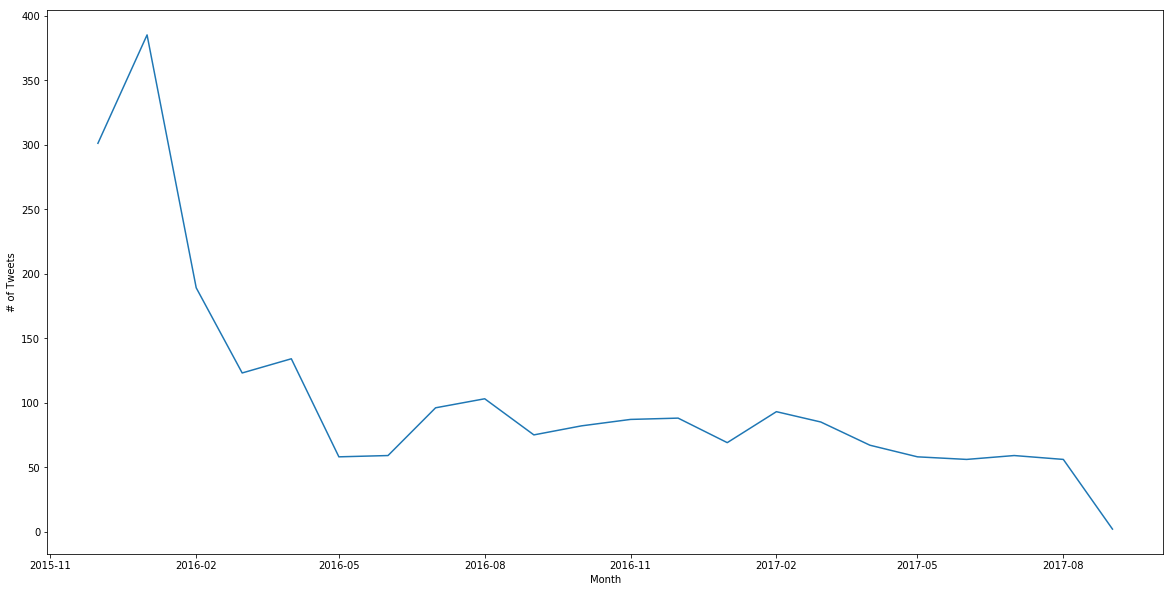

In [97]:
x = np.array(monthTrend_df['begin_month'])
y= np.array(monthTrend_df['tweet_count'])

font = {'family': 'sans',
        'color':  'darkred',
        'weight': 'normal',
        'size': 30,
        }


fig, ax = plt.subplots()

ax.set(xlabel= 'Month', ylabel= '# of Tweets')
plt.rc('axes', labelsize= 8)

fig.set_size_inches(20, 10)
line1 = ax.plot(x, y)


plt.show()

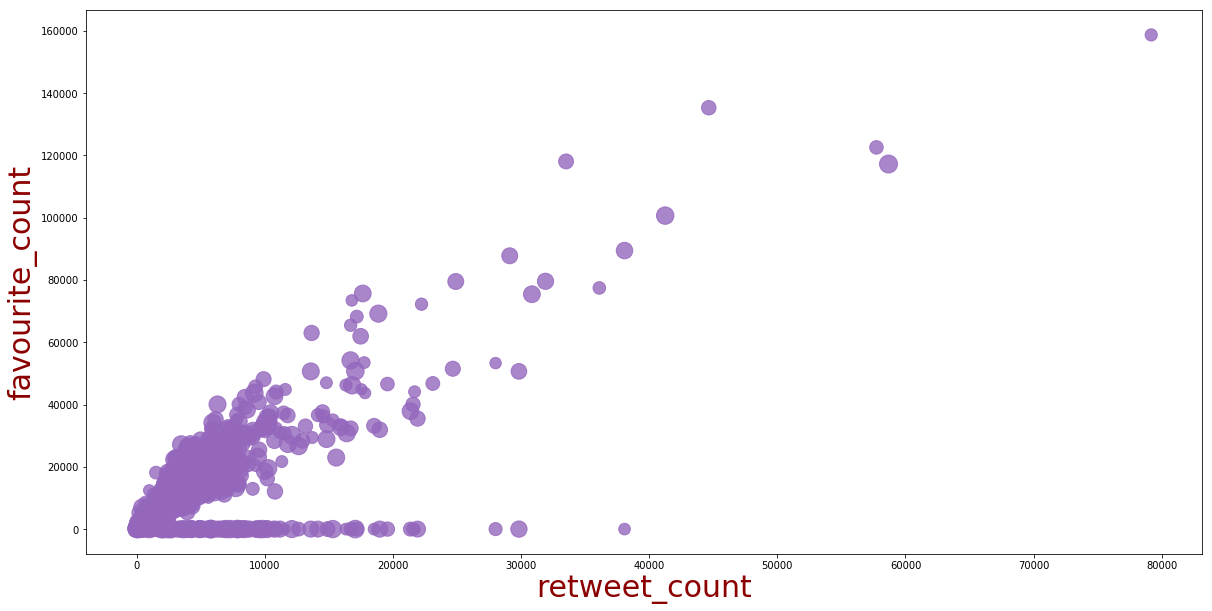

In [98]:
x= twitterFinal_df['retweet_count']
y= twitterFinal_df['favorite_count']
s = np.random.rand(*x.shape) * 800 + 500

font = {'family': 'sans',
        'color':  'darkred',
        'weight': 'normal',
        'size': 30,
        }


plt.figure(figsize=(20, 10 ))

plt.scatter(x, y, s, c='#9467BD', alpha=.8, marker='.')
plt.xlabel('retweet_count', fontdict=font)
plt.ylabel('favourite_count', fontdict=font)
plt.rc('axes', labelsize= 8)
plt.tick_params(axis= {'x', 'y'}, labelsize = 10)

plt.show()

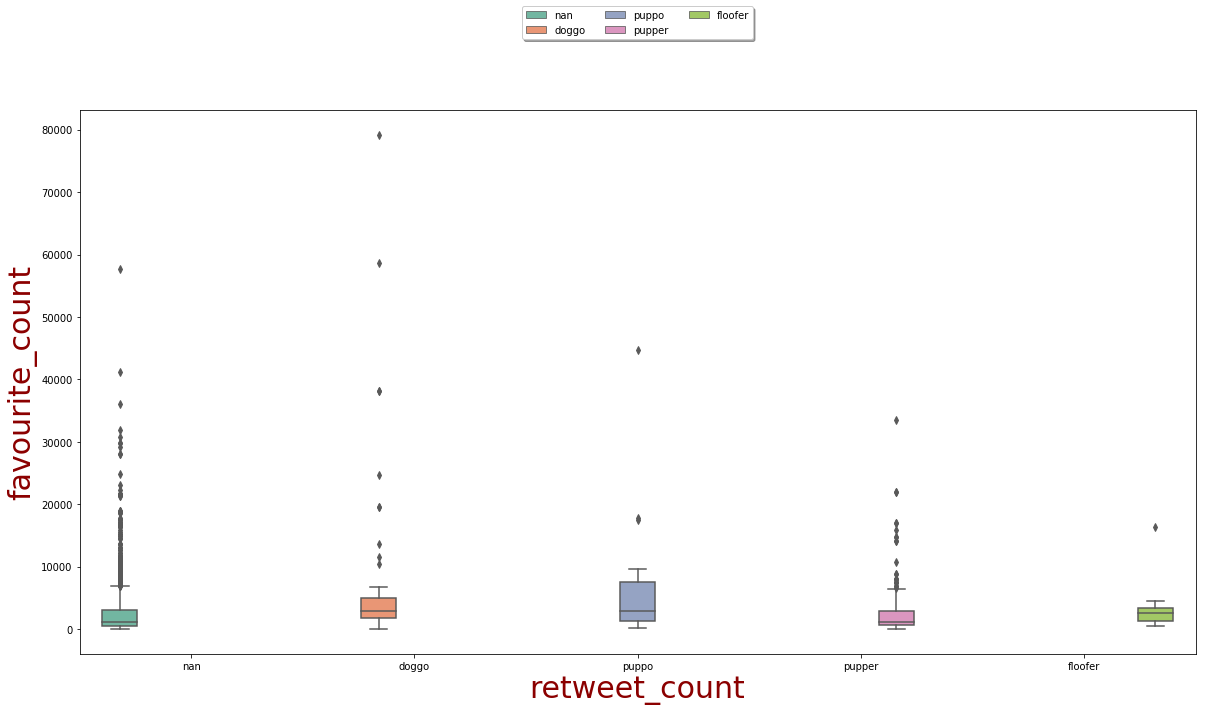

In [99]:
font = {'family': 'sans',
        'color':  'darkred',
        'weight': 'normal',
        'size': 30,
        }

plt.subplots(figsize=(20,10))
sns.boxplot(twitterFinal_df['dog_type'], twitterFinal_df['retweet_count'], hue=twitterFinal_df['dog_type'], palette="Set2");
plt.legend(loc=8)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, fancybox=True, shadow=True)


plt.xlabel('retweet_count', fontdict=font)
plt.ylabel('favourite_count', fontdict=font)
plt.rc('axes', labelsize= 8)
plt.tick_params(axis= {'x', 'y'}, labelsize = 10)
#plt.xlabel("Rating Year"); plt.ylabel("Rating");

In [100]:
# popular breed 
breedPopularity_df = pd.DataFrame(twitterFinal_df.groupby('prediction_1')['favorite_count'].sum()).reset_index()

In [101]:
breedPopularity_df.sort_values(by='favorite_count', ascending=False, inplace= True)

In [102]:
breedPopularity_df.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
index             110 non-null int64
prediction_1      110 non-null object
favorite_count    110 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ KB


In [103]:
# these are too many breeds to display, lets only include breeds where confidence interval is high
breedPopularity_df= pd.DataFrame(twitterFinal_df[twitterFinal_df['p1_conf'] > 0.5].groupby('prediction_1')
                                 ['favorite_count'].sum()).reset_index()

breedPopularity_df.sort_values(by= 'favorite_count', ascending= False, inplace= True)

Text(0.5,1,'Popularity of Dog Breeds (top 10)')

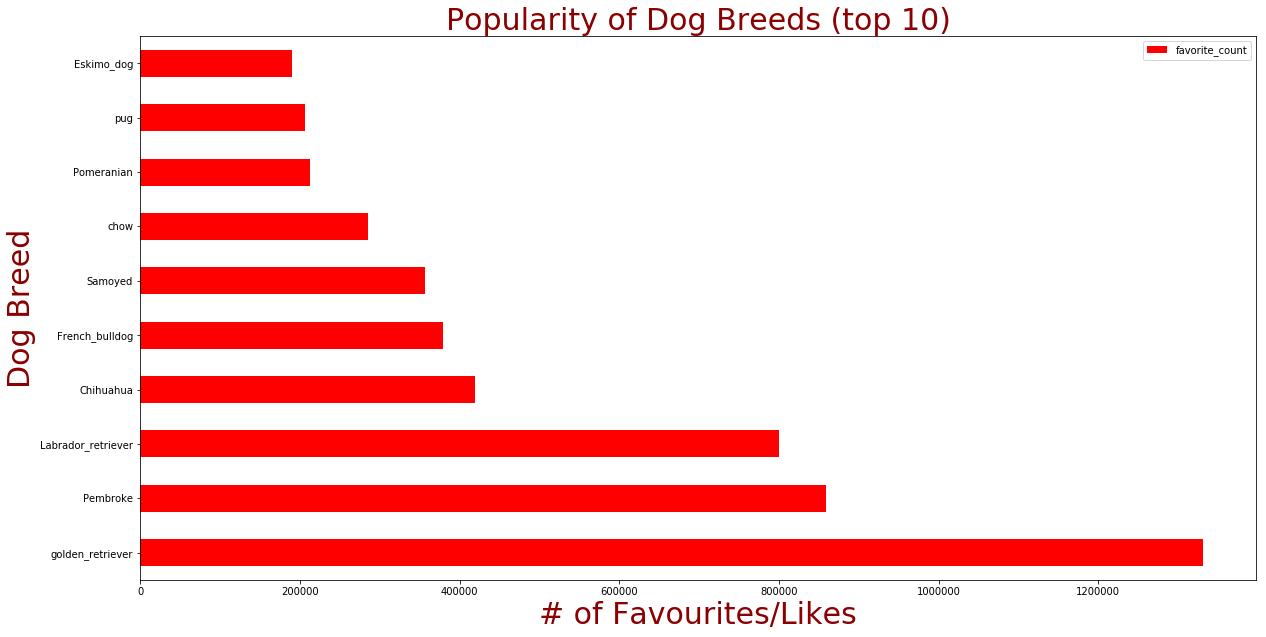

In [104]:
font = {'family': 'sans',
        'color':  'darkred',
        'weight': 'normal',
        'size': 30,
        }

breedPopularity_df[:10].plot(kind='barh', y= 'favorite_count', x= 'prediction_1', color= 'r', figsize= (20, 10))
plt.rcParams['figure.figsize'] = [20, 10]
plt.xlabel('# of Favourites/Likes', fontdict=font)
plt.ylabel('Dog Breed', fontdict=font)
plt.title('Popularity of Dog Breeds (top 10)', fontdict=font)


#plt.bar(x= breedPopularity_df['prediction_1'].head(10), height= breedPopularity_df['favorite_count'].head(10))

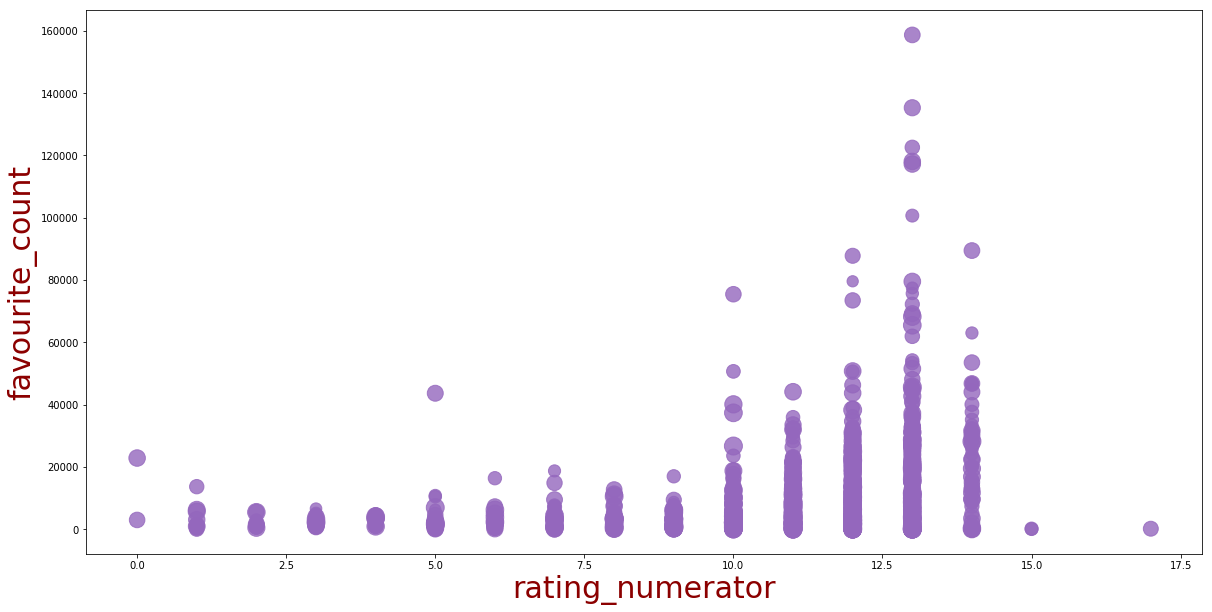

In [105]:
# Rating v/s Favs
x= twitterFinal_df['rating_numerator']
y= twitterFinal_df['favorite_count']
s = np.random.rand(*x.shape) * 800 + 500

font = {'family': 'sans',
        'color':  'darkred',
        'weight': 'normal',
        'size': 30,
        }


plt.figure(figsize=(20, 10 ))

plt.scatter(x, y, s, c='#9467BD', alpha=.8, marker='.')
plt.xlabel('rating_numerator', fontdict=font)
plt.ylabel('favourite_count', fontdict=font)
plt.rc('axes', labelsize= 8)
plt.tick_params(axis= {'x', 'y'}, labelsize = 10)

plt.show()

In [106]:
# Popular source of tweets
tweetSource_df= pd.DataFrame(twitterFinal_df.groupby('source')['tweet_id'].count()).reset_index()

In [107]:
tweetSource_df.rename(columns= {'tweet_id':'tweet_count'}, inplace= True)

In [108]:
tweetSource_df

,source,tweet_count
0,TweetDeck,10
1,Twitter Web Client,33
2,Twitter for iPhone,2191
3,Vine - Make a Scene,91


In [109]:
#concatenate tweet source and tweet_count field for display purpose
tweetSource_df['legend']= tweetSource_df['source'] + ', ' + tweetSource_df['tweet_count'].astype(str)

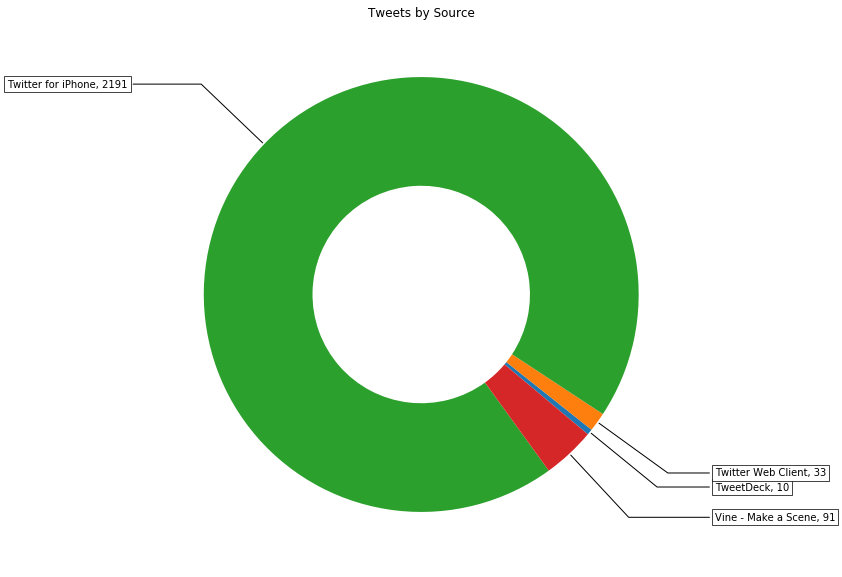

In [110]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect='equal'))

data= tweetSource_df['tweet_count']

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)


bbox_props = dict(boxstyle='square,pad=0.3', fc='w', ec='k', lw=0.72)
kw = dict(arrowprops=dict(arrowstyle='-'),
          bbox=bbox_props, zorder=0, va='center')

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: 'right', 1: 'left'}[int(np.sign(x))]
    connectionstyle = 'angle,angleA=0,angleB={}'.format(ang)
    kw['arrowprops'].update({'connectionstyle': connectionstyle})
    ax.annotate(tweetSource_df['legend'][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title('Tweets by Source')

plt.show()

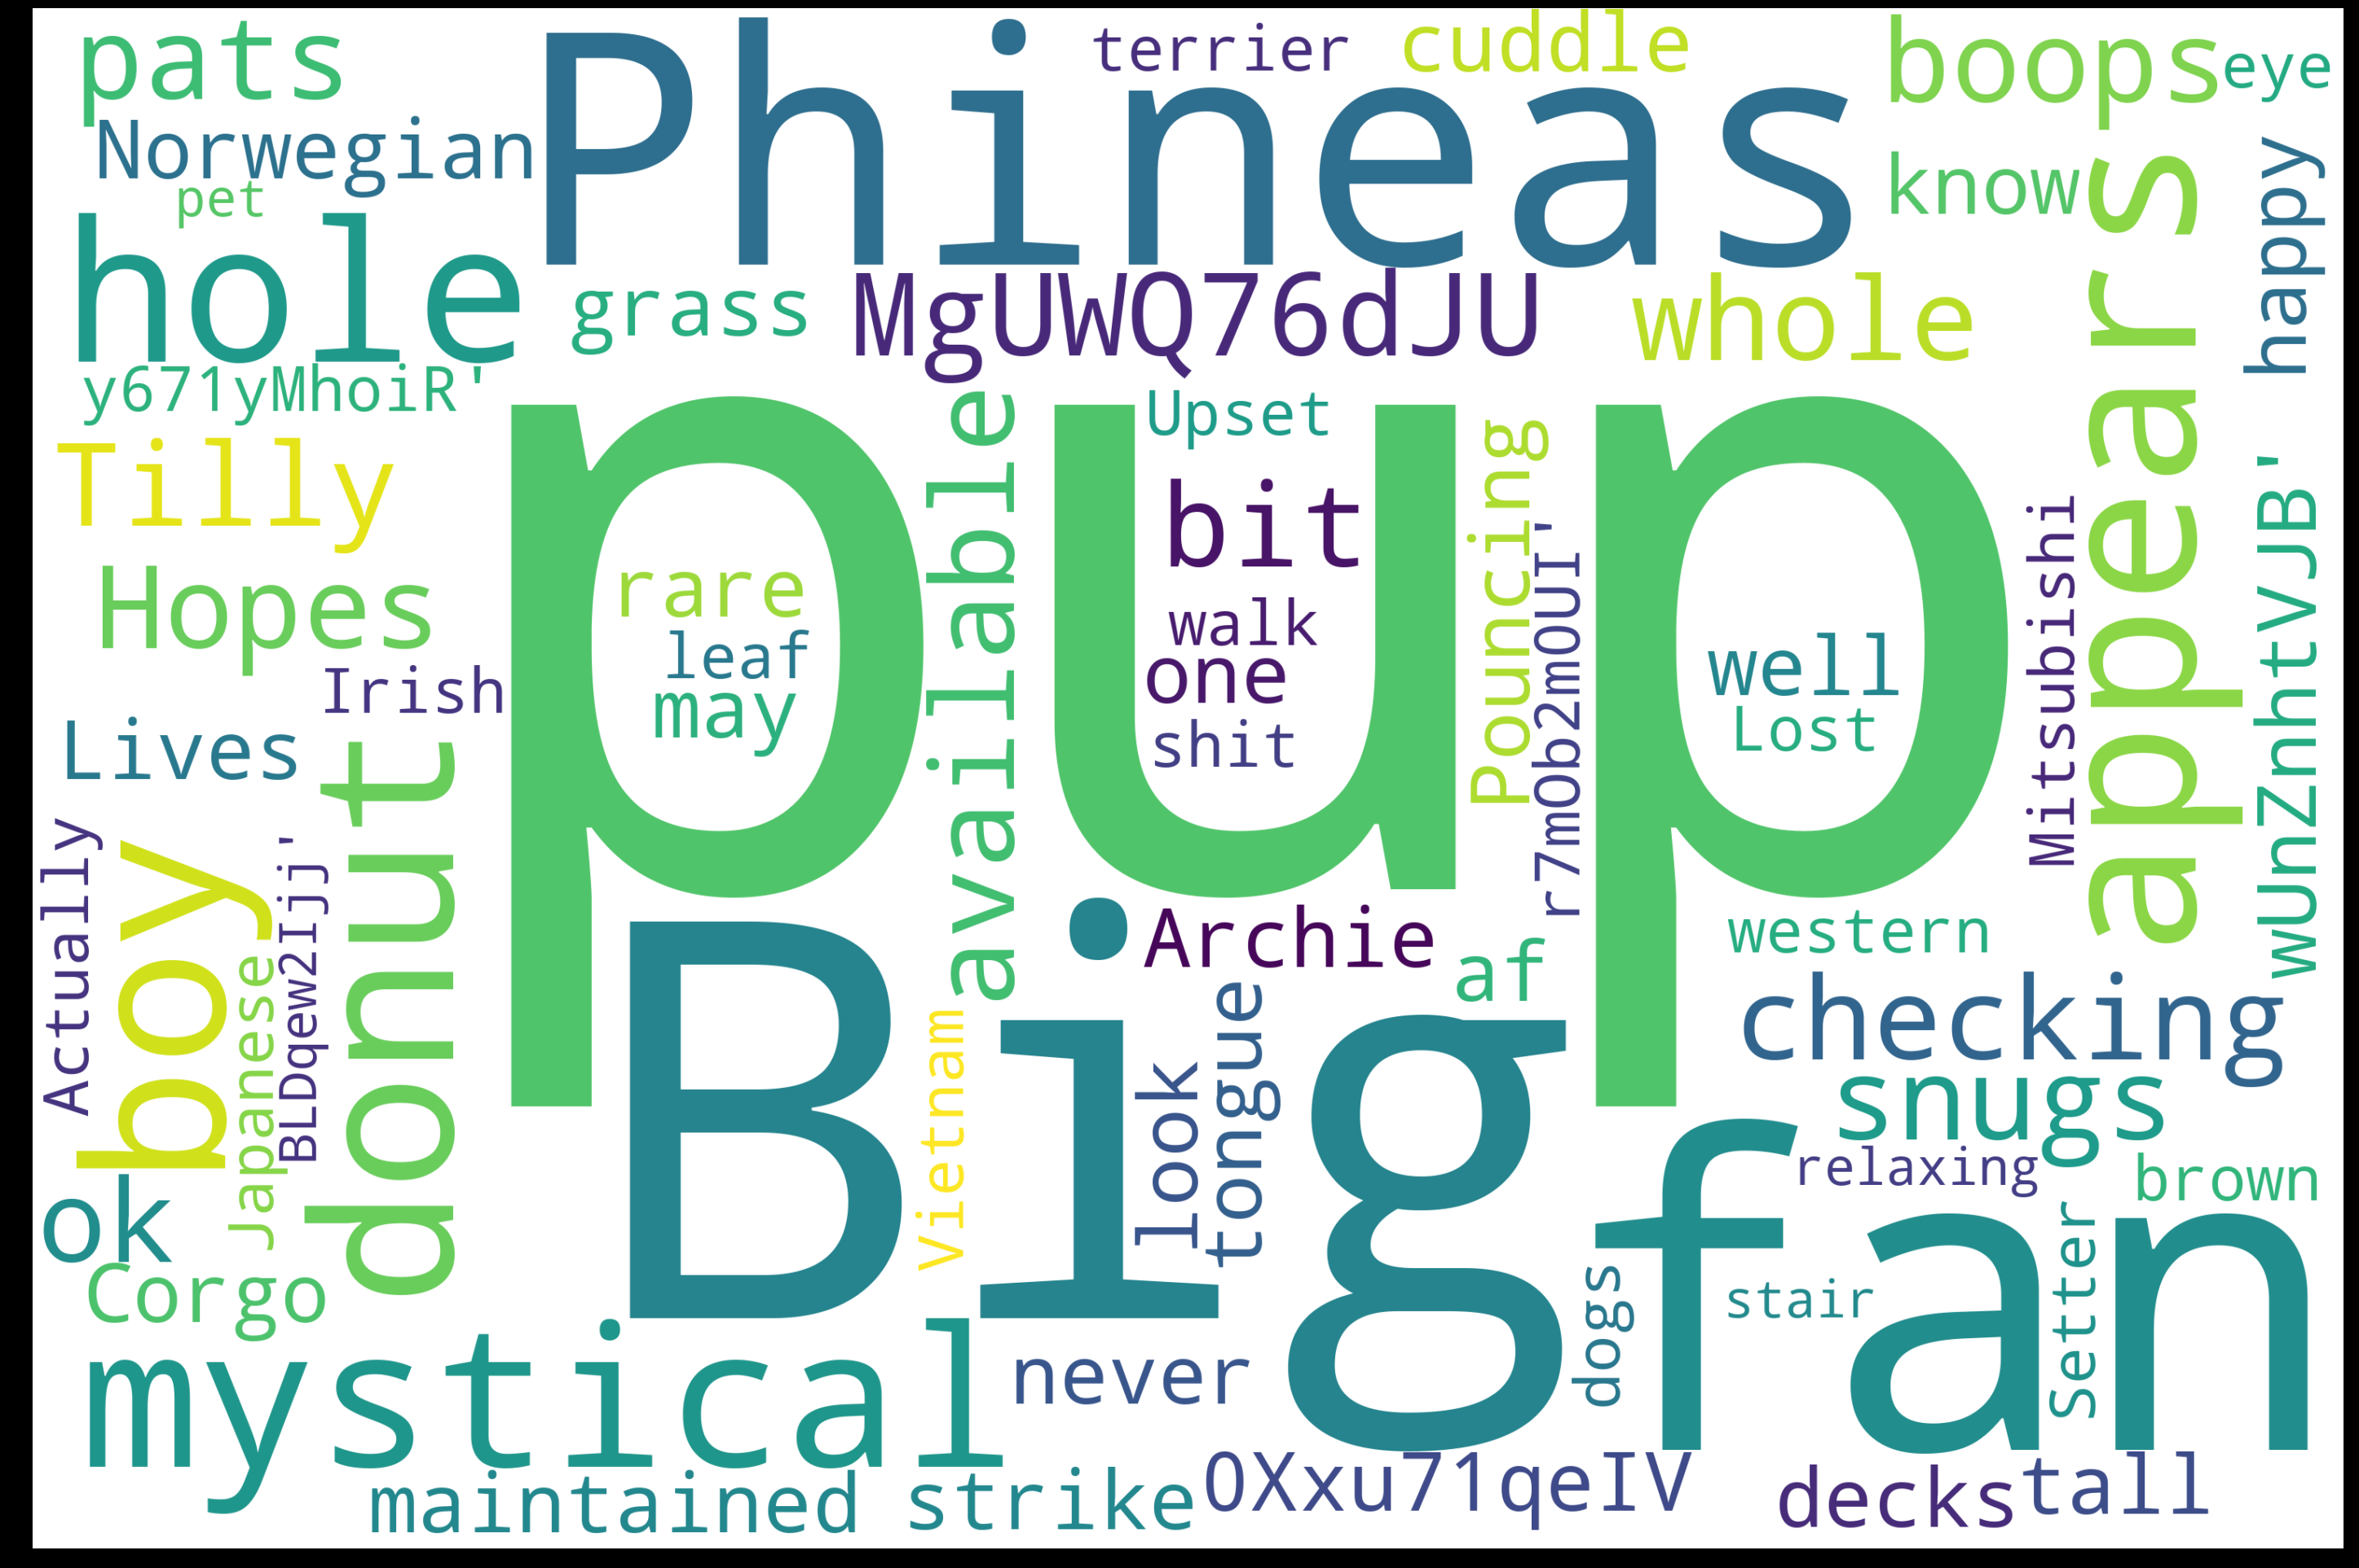

In [111]:
# word cloud of tweet texts
from wordcloud import WordCloud, STOPWORDS

# update stop word list after 1st execution of wordcloud
stop_words = ['https', 'co'] + list(STOPWORDS)

text = twitterFinal_df['text'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()